In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2

Creamos recta

In [3]:
sigma = 0.1
N=20
x = np.linspace(0,3,N)
y_mod = 3*x + 1
yr = sigma*np.random.randn(N)
y = y_mod + yr
yerr = sigma + sigma*np.random.randn(N)

Definimos funciones de recta y chi square

In [4]:
def recta(x,a,b):
    return a*x + b

def chisquare(t,data):
    x = data[0]
    y = data[1]
    yerr = data[2]
    mod = recta(x,t[0],t[1])
    chisq = (y-mod)**2 / yerr**2   
    return chisq.sum()

<Figure size 432x288 with 0 Axes>

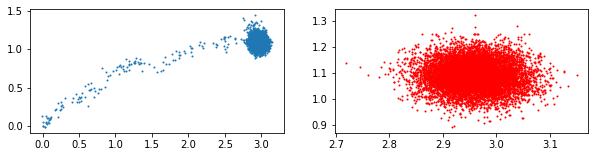

In [7]:
#Parametros iniciales
a0 = 0.
b0 = 0.
sigma_a = 0.05
sigma_b = 0.05
a = [a0]
b = [b0]
chi_0 = chisquare([a0,b0],[x,y,yerr])

for i in range(10000): 
    #Generamos dos numeros random con los que comparar
    a_rf = np.random.normal(a0,sigma_a) 
    b_rf = np.random.normal(b0,sigma_b) 
    ch_random = chisquare([a_rf,b_rf],[x,y,yerr])
    
    if ch_random < chi_0:
        a.append(a_rf)
        b.append(b_rf)
        a0 = a_rf
        b0 = b_rf
        chi_0= ch_random
        
    else:
        r = -np.log(np.random.uniform(0,1))
        resta = abs(ch_random-chi_0)
        if resta<r:
            a.append(a_rf)
            b.append(b_rf)
            a0 = a_rf
            b0 = b_rf
            chi_0 = ch_random

        else:
            a.append(a_rf)
            b.append(b_rf)
            


plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.scatter(a,b,s=1)

plt.subplot(222)
plt.scatter( a[1000:], b[1000:],s=1,color = 'red')
plt.show();




Debemos continuar con el algoritmo de metropolis